In [25]:
#import netCDF4 as nc
import pandas as pd
#import pandasql as ps
import xarray as xr
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon
import numpy as np
import glob
import xarray as xr

pd.set_option('display.max_rows', 173)

In [26]:
shapeWorld = gpd.read_file('../data/world_shapefile/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')


In [27]:
# These are the dates where at least one cell is 1
data = pd.read_csv('../data/pred_new.csv')
#data.loc[data.lsm!=0].groupby(['time']).count()
#data.loc[data.predict_value>0.01].groupby(['predict_value']).count()
#2016-01-21, 2019-04-25 
data

,Unnamed: 0,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,predict_class,predict_prob
0,0,2016-01-01,0.0,20.0,0.000011,80.796135,-2.052292,0.008678,4.996910,-1.678764,-272.04962,0.00000,0.0,0,0.000783
1,1,2016-01-01,0.0,22.5,0.000011,77.748420,-4.445312,0.740505,7.517281,0.792618,-250.63333,0.00000,0.0,0,0.000783
2,2,2016-01-01,0.0,25.0,-0.000001,71.178825,-3.778427,1.056324,9.333221,0.688252,-229.52519,0.00000,0.0,0,0.000783
3,3,2016-01-01,0.0,27.5,-0.000005,73.585754,-4.695709,1.236446,9.589882,0.555519,-240.80815,0.00000,0.0,0,0.000783
4,4,2016-01-01,0.0,30.0,-0.000016,72.382780,-4.002563,0.734211,5.410950,-1.086350,-262.45557,0.00000,0.0,0,0.000783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539482,126290,2019-12-01,-30.0,80.0,0.000006,2.637233,33.277840,5.379345,-0.286896,5.558327,-277.60870,294.14987,0.0,0,0.000783
539483,126291,2019-12-01,-30.0,82.5,-0.000020,23.660923,34.272537,6.438683,-13.026535,2.857349,-270.80573,294.23798,0.0,0,0.000783
539484,126292,2019-12-01,-30.0,85.0,-0.000019,46.051540,35.755882,7.248966,-18.870102,-3.349407,-249.43092,294.26890,0.0,0,0.000783
539485,126293,2019-12-01,-30.0,87.5,-0.000014,55.855648,34.069664,6.349327,-18.801796,-8.172478,-239.36870,294.36630,0.0,0,0.000783


            latitude  longitude  lsm  predict_prob
time                                              
2016-01-01       377        377  377           377
2016-01-02       377        377  377           377
2016-01-03       377        377  377           377
2016-01-04       377        377  377           377
2016-01-05       377        377  377           377
...              ...        ...  ...           ...
2019-11-27       377        377  377           377
2019-11-28       377        377  377           377
2019-11-29       377        377  377           377
2019-11-30       377        377  377           377
2019-12-01       377        377  377           377

[1431 rows x 4 columns]
0.037929713999999996


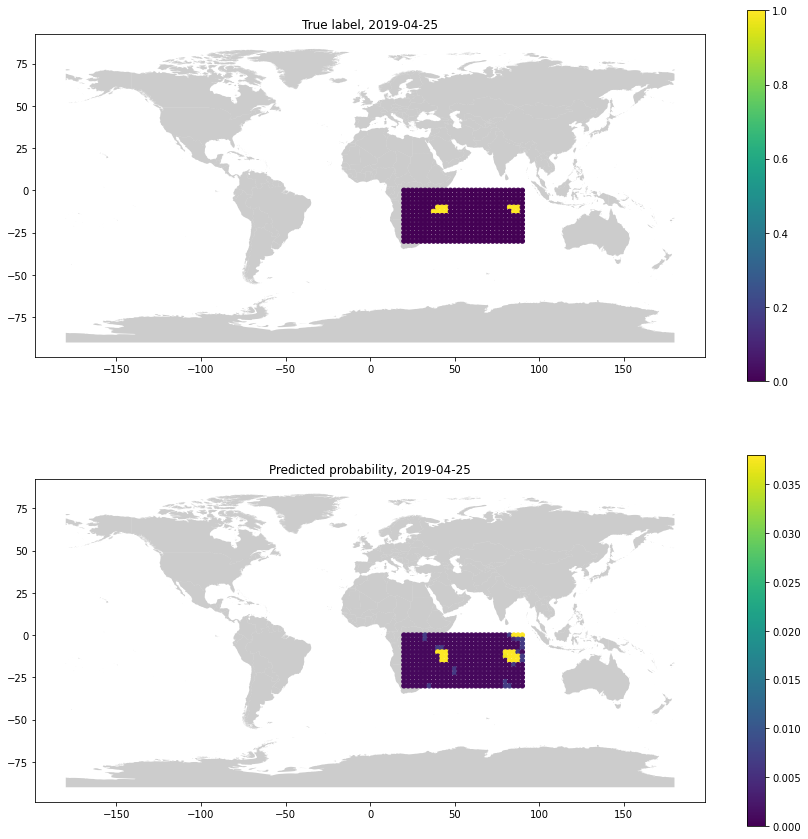

In [38]:
data = pd.read_csv('../data/pred_new.csv')
data = data.reset_index()
data = data.loc[:,['time','latitude','longitude','lsm', 'predict_prob']]
print(data.groupby(['time']).count())

dt = '2019-04-25'

data = data.loc[data.time==dt].dropna()
#data.to_csv('sst_trop_bidim1.csv',index=False)
### 2019-04-25 works well, 2019-07-15 should be 0 but predicts some higher, 2019-08-01 is correctly all 0

print(max(data.predict_prob))
crs = {'init' : 'EPSG:4326'}

geometry_mi = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
geometry_mi[:3]

features_gdf = gpd.GeoDataFrame(data,geometry=geometry_mi) # ,crs=crs

fig,ax = plt.subplots(2,1,figsize=(15,15))

shapeWorld.plot(ax=ax[0],alpha=0.4,color='grey')
features_gdf.plot(ax=ax[0],markersize=20,marker='o',label='lsm',column='lsm',legend=True, vmin=0, vmax=1)
ax[0].set_title('True label, '+str(dt))

shapeWorld.plot(ax=ax[1],alpha=0.4,color='grey')
features_gdf.plot(ax=ax[1],markersize=20,marker='o',label='predict_prob',column='predict_prob',legend=True, vmin=0, vmax=0.038)

ax[1].set_title('Predicted probability, '+str(dt))
plt.show()

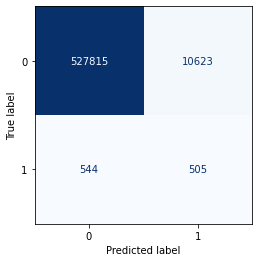

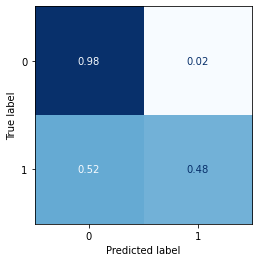

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
data = pd.read_csv('../data/pred_new.csv')
ConfusionMatrixDisplay(confusion_matrix(data.lsm, data.predict_class)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(data.lsm, data.predict_class,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)